Name: Madhusudan Hasbe\
PRN: 22070126061\
TY AIML A3

# ASSIGNMENT 8
--------------

# Fundamentals of Recurrent Neural Networks (RNN) - Implementation from Scratch

### Objectives:
1. Understand the fundamentals of Recurrent Neural Networks (RNNs).
2. Implement an RNN from scratch using a simple dataset (e.g., sine wave).

### Theory:

Recurrent Neural Networks (RNNs) are a class of artificial neural networks that are specifically designed to process and model sequence data. Unlike traditional feedforward neural networks, RNNs have the capability to retain information from previous inputs in the sequence, allowing them to capture temporal dependencies and patterns. This makes RNNs particularly useful in tasks where the order of data points is crucial, such as time series prediction, speech recognition, and natural language processing.

#### Key Concepts of RNN:

1. **Sequential Data Processing**:  
   RNNs excel in processing data that has a sequential or temporal structure. This includes time series data, sentences in natural language processing, and audio signals. Each element in the sequence is related to the previous ones, which is why maintaining context or "memory" is important for making accurate predictions.

2. **Hidden States**:  
   One of the key features of RNNs is the hidden state, which serves as a form of memory. At each time step, the RNN takes the current input and the hidden state from the previous time step to generate a new hidden state. This allows the network to "remember" information from previous steps in the sequence and pass it on as the input sequence is processed.

3. **Weight Sharing**:  
   In RNNs, the same weights are used at each time step in the sequence. This weight sharing allows the RNN to generalize across different time steps. The same set of parameters is applied to every part of the sequence, which helps reduce the number of parameters and makes RNNs less prone to overfitting.

4. **Mathematical Representation**:  
   For a given input sequence $x_1, x_2, \dots, x_T$, where $T$ is the length of the sequence, the RNN processes the sequence as follows:

   - At each time step $t$, the hidden state $h_t$ is updated based on the current input $x_t$ and the previous hidden state $h_{t-1}$:
   
     $$ h_t = f(W_{xh} \cdot x_t + W_{hh} \cdot h_{t-1} + b_h) $$

     where $W_{xh}$ are the input weights, $W_{hh}$ are the recurrent weights (between hidden states), and $b_h$ is the bias term. $f$ is a non-linear activation function (such as $\tanh$ or ReLU).

   - The output $y_t$ at time step $t$ is typically given by:

     $$ y_t = W_{hy} \cdot h_t + b_y $$

     where $W_{hy}$ are the weights from the hidden state to the output, and $b_y$ is the output bias.



5. **Backpropagation Through Time (BPTT)**:  
   RNNs are trained using a variation of backpropagation called Backpropagation Through Time (BPTT). Since the network is "unfolded" across time steps, the error gradients are propagated not only backward through the layers of the network but also backward in time, to adjust the weights based on how previous time steps affect the current output.

6. **Vanishing and Exploding Gradient Problem**:  
   One of the main challenges in training RNNs is the **vanishing gradient problem**, where gradients become very small as they are propagated back through many time steps, making it difficult for the network to learn long-term dependencies. Conversely, the **exploding gradient problem** occurs when the gradients grow exponentially large during backpropagation. These issues can limit the effectiveness of basic RNNs for tasks requiring long memory. Advanced architectures like LSTMs (Long Short-Term Memory) and GRUs (Gated Recurrent Units) are designed to address these problems.

#### Types of RNNs:

1. **Vanilla RNN**:  
   The most basic form of an RNN. It takes a single input and processes it sequentially using hidden states that are passed from one time step to the next.

2. **LSTM (Long Short-Term Memory)**:  
   A more sophisticated RNN variant designed to capture long-term dependencies. It uses gates (input, forget, and output gates) to control the flow of information and prevent vanishing gradient problems.

3. **GRU (Gated Recurrent Unit)**:  
   A simplified version of the LSTM that also helps with learning long-term dependencies. It combines the forget and input gates into a single gate, making it computationally cheaper than LSTMs while still performing well in many tasks.

#### Applications of RNNs:
RNNs have a wide range of applications, especially in tasks involving sequential data. Some common applications include:
- **Time Series Prediction**: Forecasting stock prices, weather conditions, or energy consumption based on past data.
- **Natural Language Processing (NLP)**: Tasks like language modeling, machine translation, and text generation, where the sequence of words matters.
- **Speech Recognition**: Converting spoken language into text by analyzing the sequence of sounds.
- **Music Generation**: Creating sequences of musical notes based on learned patterns.

In summary, RNNs are powerful tools for modeling sequential data. They retain memory of previous inputs and share parameters across time steps, making them suitable for tasks where the order and temporal structure of the data are important. However, they can suffer from gradient-related challenges, leading to the development of more advanced architectures like LSTMs and GRUs.

### Code:

In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
# Generate sine wave data
def generate_sine_wave_data(seq_length, num_samples):
    X = np.linspace(0, num_samples * np.pi, num_samples)
    Y = np.sin(X)
    X_train, Y_train = [], []
    for i in range(len(X) - seq_length):
        X_train.append(Y[i:i+seq_length])
        Y_train.append(Y[i+seq_length])
    return np.array(X_train), np.array(Y_train)

# Hyperparameters
seq_length = 10
num_samples = 100
hidden_size = 5  # Number of hidden units
learning_rate = 0.001
epochs = 10000

# Generate dataset
X_train, Y_train = generate_sine_wave_data(seq_length, num_samples)

In [9]:
# Initialize RNN parameters
Wxh = np.random.randn(hidden_size, seq_length) * 0.01  # Input to hidden
Whh = np.random.randn(hidden_size, hidden_size) * 0.01  # Hidden to hidden
Why = np.random.randn(1, hidden_size) * 0.01  # Hidden to output
bh = np.zeros((hidden_size, 1))  # Hidden bias
by = np.zeros((1, 1))  # Output bias

# Activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivative of sigmoid
def sigmoid_derivative(x):
    return x * (1 - x)

In [10]:
# Training the RNN
def train_rnn(X_train, Y_train, epochs, seq_length):
    global Wxh, Whh, Why, bh, by
    for epoch in range(epochs):
        total_loss = 0
        h_prev = np.zeros((hidden_size, 1))  # Initialize hidden state

        # Loop through each sequence
        for i in range(len(X_train)):
            X_seq = X_train[i].reshape(seq_length, 1)
            y_true = Y_train[i].reshape(1, 1)
            
            # Forward pass
            h = np.tanh(np.dot(Wxh, X_seq) + np.dot(Whh, h_prev) + bh)  # Hidden state
            y_pred = np.dot(Why, h) + by  # Output
            
            # Compute loss (Mean Squared Error)
            loss = (y_pred - y_true) ** 2
            total_loss += loss

            # Backward pass (Gradient calculation)
            dy = 2 * (y_pred - y_true)
            dWhy = np.dot(dy, h.T)
            dby = dy
            dh = np.dot(Why.T, dy) + (1 - h * h)  # tanh derivative
            dWxh = np.dot(dh, X_seq.T)
            dWhh = np.dot(dh, h_prev.T)
            dbh = dh

            # Update parameters using gradient descent
            Wxh -= learning_rate * dWxh
            Whh -= learning_rate * dWhh
            Why -= learning_rate * dWhy
            bh -= learning_rate * dbh
            by -= learning_rate * dby

            # Update the hidden state
            h_prev = h

        if epoch % 100 == 0:
            print(f"Epoch {epoch}, Loss: {total_loss.sum()}")

# Train the RNN
train_rnn(X_train, Y_train, epochs, seq_length)

Epoch 0, Loss: 49.2376866300426
Epoch 100, Loss: 13.698928090565046
Epoch 200, Loss: 7.9183702466162496
Epoch 300, Loss: 6.88287272522407
Epoch 400, Loss: 6.484081826389984
Epoch 500, Loss: 6.479819642048544
Epoch 600, Loss: 5.962848036839453
Epoch 700, Loss: 5.801144098105299
Epoch 800, Loss: 5.9870240708740665
Epoch 900, Loss: 9.985711477142633
Epoch 1000, Loss: 6.454953460626575
Epoch 1100, Loss: 6.520471602985507
Epoch 1200, Loss: 6.9135378950612
Epoch 1300, Loss: 6.692283681235769
Epoch 1400, Loss: 6.707332640304369
Epoch 1500, Loss: 6.6466621444212555
Epoch 1600, Loss: 6.896647457912576
Epoch 1700, Loss: 7.020119863796648
Epoch 1800, Loss: 6.8369195255474615
Epoch 1900, Loss: 6.876547119907076
Epoch 2000, Loss: 6.894870142819305
Epoch 2100, Loss: 6.888814021882417
Epoch 2200, Loss: 8.181277613452613
Epoch 2300, Loss: 6.870413873009843
Epoch 2400, Loss: 6.803792821725995
Epoch 2500, Loss: 6.867364977748016
Epoch 2600, Loss: 6.936685342197392
Epoch 2700, Loss: 6.900856022084467
Epo

In [11]:
# Testing the RNN
def predict(X_test):
    h_prev = np.zeros((hidden_size, 1))  # Initialize hidden state
    predictions = []
    for i in range(len(X_test)):
        X_seq = X_test[i].reshape(seq_length, 1)
        h = np.tanh(np.dot(Wxh, X_seq) + np.dot(Whh, h_prev) + bh)  # Hidden state
        y_pred = np.dot(Why, h) + by  # Output
        predictions.append(y_pred.item())
        h_prev = h  # Update hidden state
    return predictions

# Predict on training data
predictions = predict(X_train)

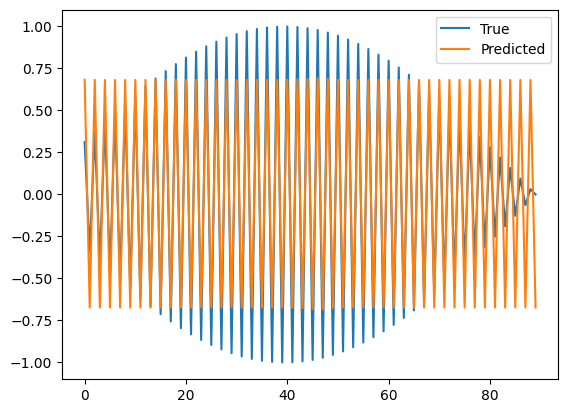

In [12]:
# Plot the results
plt.plot(Y_train, label="True")
plt.plot(predictions, label="Predicted")
plt.legend()
plt.show()

### Conclusion:
In this notebook, we implemented a basic RNN from scratch using numpy to predict sine wave data. The RNN was trained using gradient descent and was able to capture the sequential nature of the sine wave. The same approach can be applied to more complex tasks such as text generation, time series forecasting, and natural language processing.